# AnyoneAI - Project I

# An analysis of NBA players in the 2021/2022 season

Hi! this is the first of several projects we're going to be working on during this course. 
You will be expected to finish this on your own, but you can use the available channels on Discord to ask questions and help others. Please read the entire notebook before starting, this will give you a better idea of what you need to accomplish.

This project will rely heavily in the use of API as data sources. Contrary to most machine learning challenges and competitions, working in the industry usually requires the ML Developer to work with multiple teams and use heterogeneous sources of information to get the necessary data to solve a particular problem. Access to data is often provided through application programming interfaces (APIs), whether internal or external to the organization. It is very important to understand how to interact with APIs to collect data in our day to day work.

You might be wondering: why basketball? The main reason is availability of data.

The sport is played at a fast pace, with hundreds of plays in each single game, thousands of games in a season, and with a relatively small amount of on-court players, which gives them a lot of interactions with the ball, which in turn provides an oportunity to collect a great amount of data about each player performance.

These are the objectives of the project:
- Understanding how to query an API to create a dataset with Python and Pandas
- Learning how to cleanup a dataset and generate new fields from calculated data
- Storing the created dataset in a serialized manner
- Generating statistics about the data
- Visualizing data

## Introduction

### A brief description of basketball and the NBA

The National Basketball Association is the main basketball league in the United States of America. It currently features 30 teams from different cities, divided in 2 conferences (East and West) of 15 teams. Each team plays a total of 82 games during the regular season. After that, the 8 teams with better records from each conference are seeded in a playoff format, with the winner of each conference playing the finals to determine the eventual champion. NBA seasons usually play out between october of one year, to june of the next year, so for example the current season being played is called the 2021/2022 season.

As in most leagues in the world, the game is played 5 vs 5 players, with as many as 9 reserve players that can rotate with the starters as many times as the team wants. Games are played to 48 minutes, so the total amount of minutes of combined play time for any team in a single game with no added time is 240 minutes. If the score is tied at the end of the 48 minutes, 5 minutes of extra time are played, this continues until a winner is decided.

Even though they can play multiple positions, players are usually classified according to the following positions:

- Guards
    - Point Guards
    - Shooting Guards
- Forwards
    - Small Forwards
    - Power Forwards
- Centers

We will mainly focus on the three main positions: Guards/Forwards/Centers

### The dataset

You'll be in charge of creating our dataset. We want to create a single pandas dataframe with information about all active players in the current NBA season. 
The dataset needs to have the following structure:

- Personal Information
    - player_id (int) (INDEX) 
    - player_name (str)
    - team_name (str)
    - position (str)
    - height (int) (in centimeters) 
    - weight (float) (in kilograms)
    - country of origin (str)
    - date_of_birth (datetime)
    - age (str) (years and months)
    - years_of_experience (int) (years since entering the league)
    - Draft position (int)
- Player career statistics
    - games played (int)
    - minutes per game (float)
    - points per game (float)
    - rebounds per game (float)
    - assists per game (float)
    - steals per game (float)
    - blocks per game (float)
- Misc
    - salary in dollars (int) (contract value for this season only)

Here is a sample of how the final result should look like:

In [1]:
import pandas as pd

sample_dict = {
    'PLAYER_NAME': {200765: 'Rajon Rondo',  203107: 'Tomas Satoransky',  204060: 'Joe Ingles'},
    'TEAM_NAME': {200765: 'Cavaliers', 203107: 'Wizards', 204060: 'Trail Blazers'},
    'POSITION': {200765: 'Guard', 203107: 'Guard', 204060: 'Forward'},
    'HEIGHT': {200765: 185, 203107: 201, 204060: 203},
    'WEIGHT': {200765: 82, 203107: 95, 204060: 100},
    'COUNTRY': {200765: 'USA', 203107: 'Czech Republic', 204060: 'Australia'},
    'BIRTHDATE': {200765: pd.Timestamp('1986-02-22 00:00:00'), 203107: pd.Timestamp('1991-10-30 00:00:00'), 204060: pd.Timestamp('1987-10-02 00:00:00')},
    'SEASON_EXP': {200765: 15, 203107: 5, 204060: 7},
    'DRAFT_NUMBER': {200765: '21', 203107: '32', 204060: 'Undrafted'},
    'GP': {200765: 957, 203107: 388, 204060: 590},
    'MIN': {200765: 29.9, 203107: 22.2, 204060: 25.7},
    'PTS': {200765: 9.8, 203107: 6.9, 204060: 8.6},
    'REB': {200765: 4.5, 203107: 2.9, 204060: 3.2},
    'AST': {200765: 7.9, 203107: 4.1, 204060: 3.8},
    'STL': {200765: 1.6, 203107: 0.8, 204060: 0.9},
    'BLK': {200765: 0.1, 203107: 0.2, 204060: 0.2},
    'SALARY': {200765: 2641691, 203107: 10468119, 204060: 14000000},
    'AGE': {200765: '36 years, 1 months, 19 days', 203107: '30 years, 5 months, 11 days', 204060: '34 years, 6 months, 8 days'}
}
pd.DataFrame(sample_dict)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,AGE
200765,Rajon Rondo,Cavaliers,Guard,185,82,USA,1986-02-22,15,21,957,29.9,9.8,4.5,7.9,1.6,0.1,2641691,"36 years, 1 months, 19 days"
203107,Tomas Satoransky,Wizards,Guard,201,95,Czech Republic,1991-10-30,5,32,388,22.2,6.9,2.9,4.1,0.8,0.2,10468119,"30 years, 5 months, 11 days"
204060,Joe Ingles,Trail Blazers,Forward,203,100,Australia,1987-10-02,7,Undrafted,590,25.7,8.6,3.2,3.8,0.9,0.2,14000000,"34 years, 6 months, 8 days"


##1. Collecting information for building our dataset

In this section, we're only going to work on collecting the necessary raw data to build the required dataset. Don't worry about finishing everything here, we'll generate the appropiate fields and merge the data into a single dataframe in the next section.

To get the information, you can use any public and free API you can find, but you have to provide the code that gets the information here. We recommend using this API:
 
- https://github.com/swar/nba_api

    This is a Python library that can be used to obtain data from stats.nba.com, it provides a set of methods that abstracts you from making the http calls, but directly makes calls to nba stats page and parses the results. [Here](https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb) are a couple of examples on how to use it.
    

A few notes on data collection:

- Start simple. Try to get all the required information for 1 player, read the APIs documentation carefuly, then think about how to use them to collect all players data. 

- Please bear in mind that the most public APIs have some kind of rate limit, so you have to be careful about iterating on data and making lots of requests in a short amount of time (a 1 second delay between calls to the api should be enough). Once you've collected what you needed, save it to file in order to retrieve it later without calling the API again.

- A key consideration: we only want data about players that have played in the current season, so make sure to filter those out before collecting the rest of the information.

- There is at least one piece of information you're not going to find in both of those APIs: the player contract information. Use the "contracts.csv" that is provided to you.

1.1- Create a function to find all ACTIVE players, meaning players that are listed with a team in the 2021/2022 season. For now you only need the player id, name, and team. Save the dataframe to a csv named "nba_current_players_list.csv". The function should return the dataframe.

Hint: you should find an API method that can give you a list of players in just one call, this way we can filter those players we're interested in, and later will make calls for each specific player.

Consider dropping: 
- All players with TEAM_ID == 0
- All players with GAMES_PLAYED_FLAG == N
- Players with id 1630597 & 1630492 (These guys are a problem ;))

In [2]:
# Libraries
import numpy as np
import pandas as pd
from nba_api.stats.endpoints.playercareerstats import PlayerCareerStats
from nba_api.stats.endpoints.commonplayerinfo import CommonPlayerInfo
from nba_api.stats.endpoints.commonallplayers import CommonAllPlayers
from time import sleep
import unidecode
from dateutil.relativedelta import relativedelta
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import geopandas
import mapclassify

In [3]:
### Complete in this cell: get all active players from the api

def get_and_save_players_list():
    # Request the dataframe with the info from all players
    df_all_players = CommonAllPlayers().common_all_players.get_data_frame()

    ## Masks
    # Mask to exclude players that didn't play on 2021 or 2022
    mask_active_players = df_all_players["TO_YEAR"] >= "2021"
    # Mask to exclude players whos TEAM_ID is 0
    mask_team_id_0 = df_all_players["TEAM_ID"] != 0
    # Mask to exclude players with GAMES_PLAYED_FLAG == N
    mask_gp_flag_n = df_all_players["GAMES_PLAYED_FLAG"] != "N"
    # Mask to exclude problematic players (1630597 & 1630492)
    mask_problematic_players = (df_all_players["PERSON_ID"] != 1630597) & (df_all_players["PERSON_ID"] != 1630492)
    
    # Apply the masks and save the data to a dataframe
    df_current_players = df_all_players[mask_active_players & mask_team_id_0 & mask_gp_flag_n & mask_problematic_players]
    return df_current_players

In [4]:
current_players_list = get_and_save_players_list()
current_players_list.to_csv("nba_current_players_list.csv")

*Don't change anything in this cell, just make it run correctly*

In [5]:
if current_players_list.shape == (503, 16):
    print('Success!')
else:
    raise ValueError('The shape is incorrect, please review your function')

Success!


1.2- Create a function to find the personal information of all players listed in the dataframe created in the previous step, and save it to a csv file named "nba_players_personal_info.csv". The function should also return the created dataframe.

OPTIONAL: iterating on a list of players and making API calls can be complex and full of errors, try a code block that handles exceptions (for example a timeout from the API) and returns the partial result before it failed, you could also save the partial information to disk.

In [6]:
### Complete in this cell: Find players personal information (name, age, dob, etc), store the information in a CSV file.

def get_players_personal_information(current_players_list):
    # Initialize dataframe
    df_players_info = pd.DataFrame()

    # Loop through current players list to request info for each one
    for player in current_players_list["PERSON_ID"]:
        # Save the players info
        player_info = CommonPlayerInfo(player).common_player_info.get_data_frame()
        # Concatenate the player info to the dataframe
        df_players_info = pd.concat([df_players_info, player_info], ignore_index=True)
        # To prevent problems with the API
        sleep(0.5)
    return df_players_info

In [7]:
players_personal_info = get_players_personal_information(current_players_list)
players_personal_info.to_csv("nba_players_personal_info.csv")

*Don't change anything in this cell, just make it run correctly*

In [8]:
if players_personal_info.shape == (503, 33):
    print('Success!')
else:
    raise ValueError('The shape is incorrect, please review your function')

Success!


1.3- Create a function to find players career statistics, store the information in a CSV file called "nba_players_career_stats.csv"

In [9]:
### Complete in this cell: find players career stats, save to csv file

def get_players_career_stats(current_players_list):
    # Initialize dataframe
    df_players_info = pd.DataFrame()

    # Loop through current players list to request info for each one
    for player in current_players_list["PERSON_ID"]:
        # Save the players info
        player_info = PlayerCareerStats(player, per_mode36="PerGame").career_totals_regular_season.get_data_frame()
        # Concatenate the player info to the dataframe
        df_players_info = pd.concat([df_players_info, player_info], ignore_index=True)
        # To prevent problems with the API
        sleep(0.5)
    return df_players_info

In [10]:
players_career_stats = get_players_career_stats(current_players_list)
players_career_stats.to_csv("nba_players_career_stats.csv")

*Don't change anything in this cell, just make it run correctly*

In [11]:
if players_career_stats.shape == (503, 24):
    print('Success!')
else:
    raise ValueError('The shape is incorrect, please review your function')

Success!


1.4- Create a function to find players salary for this season. You can get the list of players and salaries from this file: [contracts.csv](https://drive.google.com/file/d/1bxjuIZfMS2_kickukdC3ggdXIVeZE5y7/view?usp=sharing). Download and use this file as input for your function `get_nba_players_salaries()`.

Also, inside this function, save the information to a csv called "nba_players_salary.csv". Make sure the players names format match the ones in the API, otherwise you won't be able to merge the data later.

*Hint:* Using data from the Basketball Reference page, you will have to solve 3 kinds of problems:
1. Special characters that need to be removed.
2. Duplicated values (for which you should keep just the first value) and,
3. Players names not matching with the ones from the API. 

The latter problem has multiple causes, one of them is that some names are written with non ascii characters, we advice you to install and use [Unidecode](https://pypi.org/project/Unidecode/) library to solve this issue.

In [12]:
### Complete in this cell: find players salary, save the information to csv

def get_nba_players_salaries(csv_file_path):
    # Read the file and create dataframe
    df_raw_salaries = pd.read_csv(csv_file_path, header=1)[["Player", "2021-22"]]
    
    # Standarize column names
    df_raw_salaries.rename(columns={"Player": "PLAYER_NAME", "2021-22": "SALARY"}, inplace=True)
    
    # Clean data
    df_raw_salaries.drop_duplicates(inplace=True)
    df_raw_salaries.dropna(inplace=True)
    
    # Transform names to ascii
    df_raw_salaries["PLAYER_NAME"] = df_raw_salaries["PLAYER_NAME"].apply(lambda x: unidecode.unidecode(x))
    
    # Delete strings that are not part of the players name
    df_raw_salaries["PLAYER_NAME"] = df_raw_salaries["PLAYER_NAME"].apply(lambda x: x[:x.find("\\")])
    
    # Delete "$" from salary column
    df_raw_salaries["SALARY"] = df_raw_salaries["SALARY"].apply(lambda x: x.replace("$", ""))
    
    return df_raw_salaries  

In [13]:
players_salaries = get_nba_players_salaries("contracts.csv")
players_salaries.to_csv("nba_players_salary.csv")

*Don't change anything in this cell, just make it run correctly*

In [14]:
index_salary_1 = players_salaries[players_salaries['PLAYER_NAME']=='Kyrie Irving'].index.values[0]
index_salary_2 = players_salaries[players_salaries['PLAYER_NAME']=='Luke Kennard'].index.values[0]

if players_salaries.SALARY.loc[index_salary_1] == '34916200' and players_salaries.SALARY.loc[index_salary_2] == '12727273':
    print('Success!')
else:
    raise ValueError('The salaries are incorrect, please review your function')

Success!


1.5- Create a function to merge the created dataframes: players_personal_info, players_career_stats, players_next_game, players_salaries. For each dataframe, select only the subset of columns needed to create the dataset described in section "The Dataset"

    - Players info: "PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"
    - Players stats: "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"
    - Misc: "SALARY"

Save the result to a csv called "raw_nba_players_dataset.csv"

Hint: Before merging the data, you should make sure all four dataframes have the same length, are indexed by PERSON_ID and have the same keys

In [15]:
### Complete in this cell: merge the dataframes
def merge_dataframes(players_personal_info, players_career_stats, players_salaries):    
    # Merge players info and stats
    raw_info_df = pd.concat([players_personal_info, players_career_stats], axis=1)
    
    # Merge salary
    # Create PLAYER_NAME column 
    raw_info_df["PLAYER_NAME"] = players_personal_info['FIRST_NAME'] + " " + players_personal_info['LAST_NAME']
    raw_info_df = pd.merge(raw_info_df, players_salaries, on=["PLAYER_NAME"], how="left")
    
    # Set PERSON_ID as index
    raw_info_df.set_index("PERSON_ID", inplace=True)
    raw_info_df.index.name = None
    
    # Filter the columns
    raw_info_df = raw_info_df[["PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER", "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK", "SALARY"]]
    
    return raw_info_df

In [16]:
raw_players_dataset = merge_dataframes(players_personal_info, players_career_stats, players_salaries)
raw_players_dataset.to_csv("raw_nba_players_dataset.csv")

*Don't change anything in this cell, just make it run correctly*

In [17]:
if raw_players_dataset.shape == (503, 17):
    print('Success!')
else:
    raise ValueError('The shape is incorrect, please review your function')

Success!


##2. Data Cleaning and Preprocessing

There are several steps that you will have to follow, depending on where you have collected the data some information might be missing.  

- Height and weight might need to be converted to the metric system
- Players that have no team assigned should be removed from the dataset
- Players with no contracts (meaning they don't have a salary defined) should be removed from the dataset
- If the "position" data is ambiguous (listed at multiple positions), use the first value
- If the player does not have height or weight data, use the average for its position as its value

2.1- Create a copy of your dataset named "working_df", remove all players with no teams or salary

In [18]:
### Complete in this cell: copy the dataset and drop NaNs in team or salary
def copy_and_delete_nan(players_dataset):
    mask_team_Nan = players_dataset["TEAM_NAME"].notna()
    mask_salary_Nan = players_dataset["SALARY"].notna()
    return players_dataset[mask_team_Nan & mask_salary_Nan].copy()

In [19]:
working_df = copy_and_delete_nan(raw_players_dataset)

*Don't change anything in this cell, just make it run correctly*

In [20]:
if working_df.shape == (429, 17):
    print('Success!')
else:
    print(working_df.shape)
    raise ValueError('The shape is incorrect, please review your function')

Success!


2.2- Cast Salary and Birthday columns to its corresponding type (int, datetime)

In [21]:
### Complete in this cell: cast all columns to its type
def cast_columns(working_df):
    working_df["SALARY"] = working_df["SALARY"].apply(lambda x: int(x))
    working_df["BIRTHDATE"] = pd.to_datetime(working_df["BIRTHDATE"])
    pass

In [22]:
cast_columns(working_df)

*Don't change anything in this cell, just make it run correctly*

In [23]:
if working_df.SALARY.dtype == 'int64' and working_df.BIRTHDATE.dtype == '<M8[ns]':
    print('Success!')
else:
    raise ValueError('The types are incorrect, please review your function')

Success!


2.3- Create a function that converts the height column from height in feet and inches to centimeters

In [24]:
### Complete in this cell: convert height column
def convert_height_column(working_df):
    # Convert feet to cm, inches to cm, and adds them
    working_df["HEIGHT"] = working_df["HEIGHT"].apply(lambda x: math.ceil(float(x.split("-")[0]) * 30.48 + float(x.split("-")[1]) * 2.54))
    pass

In [25]:
convert_height_column(working_df)

*Don't change anything in this cell, just make it run correctly*

In [26]:
index_df_1 = working_df[working_df['PLAYER_NAME']=='Kyrie Irving'].index.values[0]
index_df_2 = working_df[working_df['PLAYER_NAME']=='Luke Kennard'].index.values[0]

if working_df.HEIGHT.loc[index_df_1] == 188 and working_df.HEIGHT.loc[index_df_2] == 196:
    print('Success!')
else:
    raise ValueError('The values are incorrect, please review your function')

Success!


2.4- Create a function that converts the weight column from pounds to kilograms

In [27]:
### Complete in this cell: convert weight column
def convert_weight_column(working_df):
    # Convert pounds to kg
    working_df["WEIGHT"] = working_df["WEIGHT"].apply(lambda x: float(x) * 0.45359237).apply(lambda x: int(x))
    pass

In [28]:
convert_weight_column(working_df)

*Don't change anything in this cell, just make it run correctly*

In [29]:
if working_df.WEIGHT.loc[index_df_1] == 88 and working_df.WEIGHT.loc[index_df_2] == 93:
    print('Success!')
else:
    raise ValueError('The values are incorrect, please review your function')

Success!


2.5- Create a function that calculates the age in (years, months, days) and saves it in a new string column named "AGE", example: "22 years, 5 months, 25 days" 

In [30]:
### Complete in this cell: add age column
def add_age_column(working_df):
    # Gets today date
    today = pd.Timestamp(pd.Timestamp.now().date())
    # Create AGE column with players birthdates relatives to today
    working_df["AGE"] = working_df["BIRTHDATE"].apply(lambda x: relativedelta(today, x))
    # Turn timestamp to string; format to years, months, and days
    working_df["AGE"] = working_df["AGE"].apply(lambda x: f"{x.years} years, {x.months} months, {x.days} days")
    pass

In [31]:
add_age_column(working_df)

2.6- Create a function that takes care of the disambiguation of the "POSITION" column. Should replace all positions that are mixed with the first one listed.

In [32]:
### Complete in this cell: disambiguation of the position column
def update_position(working_df):
    # If "-" is in the value of POSITION that means that there are more than one positions 
    # If that's the case, split it on "-" char and return the first position
    working_df["POSITION"] = working_df["POSITION"].apply(lambda position: position.split("-")[0] if("-" in position) else position)
    pass

In [33]:
update_position(working_df)

*Don't change anything in this cell, just make it run correctly*

In [34]:
if working_df.POSITION.loc[index_df_1] == 'Guard' and working_df.POSITION.loc[index_df_2] == 'Guard':
    print('Success!')
else:
    raise ValueError('The values are incorrect, please review your function')

Success!


2.7- Review that the working dataset has all requested columns with its corresponding datatypes and save it as a csv with name "nba_players_processed_dataset.csv"

In [35]:
working_df.to_csv("nba_players_processed_dataset.csv")

In [36]:
working_df.head()

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,AGE
1630173,Precious Achiuwa,Raptors,Forward,204,102,Nigeria,1999-09-19,2,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2711280,"23 years, 0 months, 1 days"
203500,Steven Adams,Grizzlies,Center,211,120,New Zealand,1993-07-20,9,12,664,26.8,9.3,8.0,1.5,0.9,0.9,17073171,"29 years, 2 months, 0 days"
1628389,Bam Adebayo,Heat,Center,206,115,USA,1997-07-18,5,14,343,28.2,13.5,8.3,3.5,1.0,0.9,28103550,"25 years, 2 months, 2 days"
1630583,Santi Aldama,Grizzlies,Forward,211,97,Spain,2001-01-10,1,30,32,11.2,4.1,2.7,0.7,0.2,0.3,1994520,"21 years, 8 months, 10 days"
200746,LaMarcus Aldridge,Nets,Center,211,113,USA,1985-07-19,17,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2641691,"37 years, 2 months, 1 days"


##3. Analyzing and Visualizing data

Now that we have the data, let's do some work

3.1- Calculate and print the following metrics:

    - General metrics:
        - Total number of players
        - Number of USA born players
        - Number of foreign players
        - Number of players per position
        - Number of players per team
        - Number of rookies (first year players)
    - Players description
        - Average player age (in years)
        - Youngest player age (as a string, like: "22 years, 5 months, 25 days")
        - Oldest player age (as a string, like: "40 years, 2 months, 3 days")
        - Min and Max players height
        - Average height of players per position
    - Contracts
        - Min and Max salary of all players
        - Mean and Median salary of all players

Bonus: if you can, calculate how many players retired between the end of the 2020-2021 season and the start of the 2021-22 season.

In [37]:
### Complete in this cell: print general metrics

## Metrics
tot_players = len(working_df)
us_born = len(working_df[working_df["COUNTRY"] == "USA"])
not_us_born = len(working_df[working_df["COUNTRY"] != "USA"])
players_per_pos = working_df["POSITION"].value_counts()
players_per_team = working_df["TEAM_NAME"].value_counts()
tot_rookies = len(working_df[working_df["SEASON_EXP"] == 1])

## Bonus
# Get list of players IDs who retired on 2021
players_info_df = pd.read_csv("nba_players_personal_info.csv")
retired_2021 = players_info_df[players_info_df["TO_YEAR"] == 2021]["PERSON_ID"]
# Check which of those IDs match the playerst on working_df, as it contains only players with salary for the season 2021-2022
# Inverting the bools on the mask gets the players that retired on 2021, but never participated on 2021-2022 season
retired_between_seasons_mask = ~retired_2021.isin(working_df.index)
retired_between_seasons = len(retired_2021[retired_between_seasons_mask])

## Prints
print(f"Total number of players: {tot_players}\n")
print(f"Number of USA born players: {us_born}\n")
print(f"Number of foreign players: {not_us_born}\n")
print(f"Number of players per position: {players_per_pos.to_dict()}\n")
print(f"Number of players per team: {players_per_team.to_dict()}\n")
print(f"Number of rookies (first year players): {tot_rookies}\n")
print(f"Number of players retired between the end of the 2020-2021 season and the start of the 2021-22 season: {retired_between_seasons}")

Total number of players: 429

Number of USA born players: 323

Number of foreign players: 106

Number of players per position: {'Guard': 200, 'Forward': 168, 'Center': 61}

Number of players per team: {'Lakers': 18, 'Bulls': 17, '76ers': 17, 'Raptors': 16, 'Rockets': 16, 'Jazz': 16, 'Cavaliers': 16, 'Suns': 16, 'Trail Blazers': 15, 'Wizards': 15, 'Pelicans': 15, 'Nets': 15, 'Thunder': 14, 'Pistons': 14, 'Grizzlies': 14, 'Nuggets': 14, 'Bucks': 14, 'Hawks': 14, 'Timberwolves': 14, 'Warriors': 13, 'Heat': 13, 'Celtics': 13, 'Magic': 13, 'Spurs': 13, 'Knicks': 13, 'Hornets': 13, 'Pacers': 12, 'Mavericks': 12, 'Clippers': 12, 'Kings': 12}

Number of rookies (first year players): 53

Number of players retired between the end of the 2020-2021 season and the start of the 2021-22 season: 31


In [38]:
### Complete in this cell: print players descriptions


## Metrics
# Gets just the years component of AGE and calculates the mean
avrg_age = working_df["AGE"].apply(lambda x: int(x.split(",")[0].split()[0])).mean()

# Argmax returns the index of the closest date
younguest_player_years = working_df["AGE"].iloc[working_df["BIRTHDATE"].argmax()]

# Argmin returns the index of the farthest date
oldest_player_years = working_df["AGE"].iloc[working_df["BIRTHDATE"].argmin()]

min_height = working_df["HEIGHT"].iloc[working_df["HEIGHT"].argmin()]
max_heigt = working_df["HEIGHT"].iloc[working_df["HEIGHT"].argmax()]

avrg_height_per_position = working_df.groupby("POSITION").mean()["HEIGHT"]

## Prints
print(f"Average player age: {avrg_age}\n")
print(f"Youngest player age: {younguest_player_years}\n")
print(f"Oldest player age: {oldest_player_years}\n")
print(f"Min and Max players height: {min_height}, {max_heigt}\n")
print(f"Average height of players per position: {avrg_height_per_position.to_dict()}")

Average player age: 26.6993006993007

Youngest player age: 19 years, 8 months, 27 days

Oldest player age: 42 years, 3 months, 11 days

Min and Max players height: 178, 221

Average height of players per position: {'Center': 211.2622950819672, 'Forward': 203.50595238095238, 'Guard': 193.185}


In [39]:
### Complete in this cell: Contracts

## Metrics
min_salary = working_df["SALARY"].iloc[working_df["SALARY"].argmin()]
max_salary = working_df["SALARY"].iloc[working_df["SALARY"].argmax()]
mean_salary = working_df["SALARY"].mean()
median_salary = working_df["SALARY"].median()

## Prints
print(f"Min and Max salary of all players: {min_salary}, {max_salary}\n")
print(f"Mean and Median salary of all players: {mean_salary}, {median_salary}\n")

Min and Max salary of all players: 85578, 45780966

Mean and Median salary of all players: 9006231.027972028, 4670160.0



3.2- Plot the relationship between scoring (points per game) and salary of all players, the players positions should also be visible.

In [40]:
# Aesthetic settings for the plots
NBA_colors = ["#1d428a", "#c8102e", "#ffffff"]
sns.set_palette(NBA_colors)
sns.set_style("darkgrid", {"axes.facecolor": ".3",'figure.facecolor':'black', 'text.color': "1", 'axes.labelcolor': "1", 'xtick.color':'.8', 'ytick.color':'.8', 'axes.edgecolor':'0', 'boxprops':{'edgecolor':'0'}})

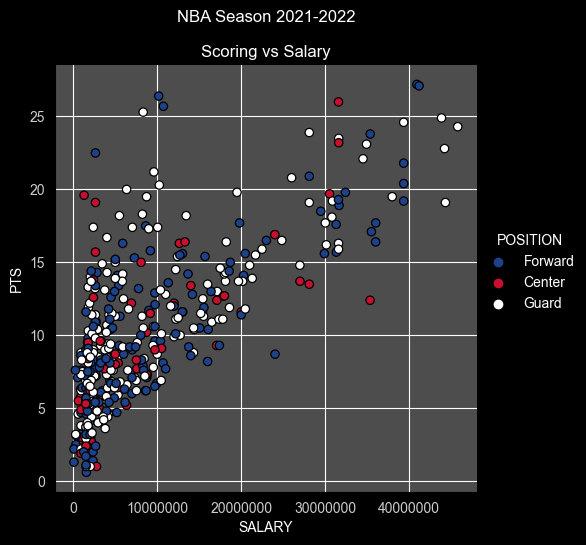

In [41]:
### Complete in this cell:  Relationship between scoring and salary (in millions of dollars)
sns.relplot(working_df, y="PTS", x="SALARY", hue="POSITION", kind="scatter", edgecolor="black", linewidth=.9).set(title="NBA Season 2021-2022\n\nScoring vs Salary")

# Prevents salary to be ploted with scientific notation
plt.ticklabel_format(style='plain')

3.3- Now plot assists-vs-salary and rebounding-vs-salary

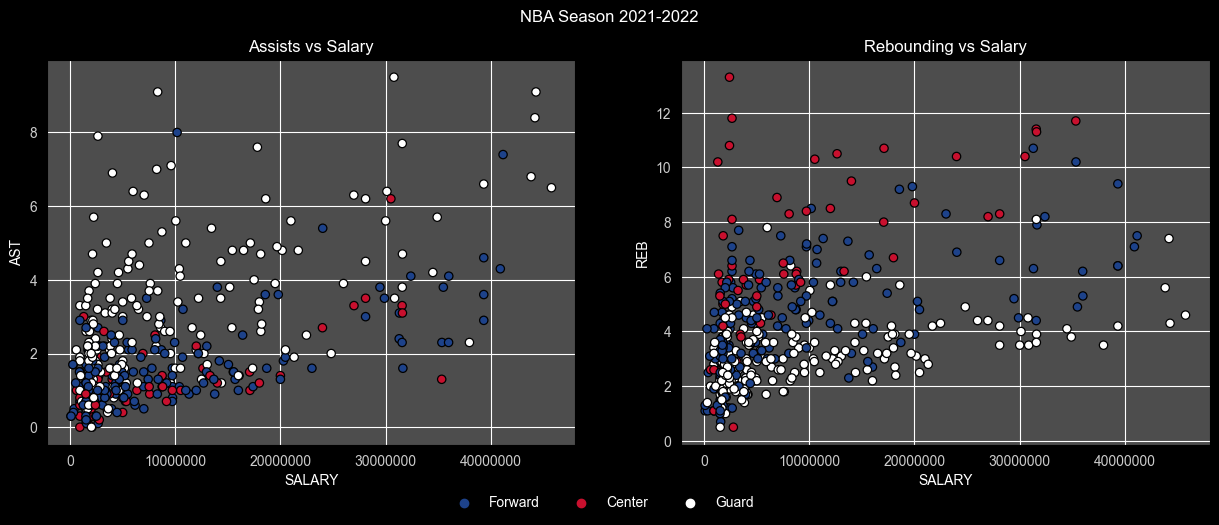

In [42]:
### Complete in this cell: plot assist-vs-salary, rebounding-vs-salary
fig, ax = plt.subplots(1,2, figsize=(15,5))

# Titles
fig.suptitle("NBA Season 2021-2022")
ax[0].title.set_text('Assists vs Salary')
ax[1].title.set_text('Rebounding vs Salary')

## Plots
# Assists vs Salary
sns.scatterplot(working_df, y="AST", x="SALARY", hue="POSITION", edgecolor="black", linewidth=.9, ax=ax[0], legend=False).ticklabel_format(style='plain')
# Rebounding vs Salary
sns.scatterplot(working_df, y="REB", x="SALARY", hue="POSITION", edgecolor="black", linewidth=.9, ax=ax[1]).ticklabel_format(style='plain')

# Use the last axis legend for the whole plot
ax[-1].legend(loc='center', bbox_to_anchor=(-.15, -.15), frameon=False, shadow=True, ncol=3)

plt.show()

3.4- When NBA players enter the league, they have low value salaries during what is called their "rookie contract". This means that it doesn't matter how well the player performs, they can't have large salaries. This can distort our understanding of how much teams value each skill, as a player could score 50 points a game and still earn just a couple of millions. So, lets now plot points, assists and rebounding vs salary, but only for players that have more than 4 years of experience (the typical length of a rookie contract)

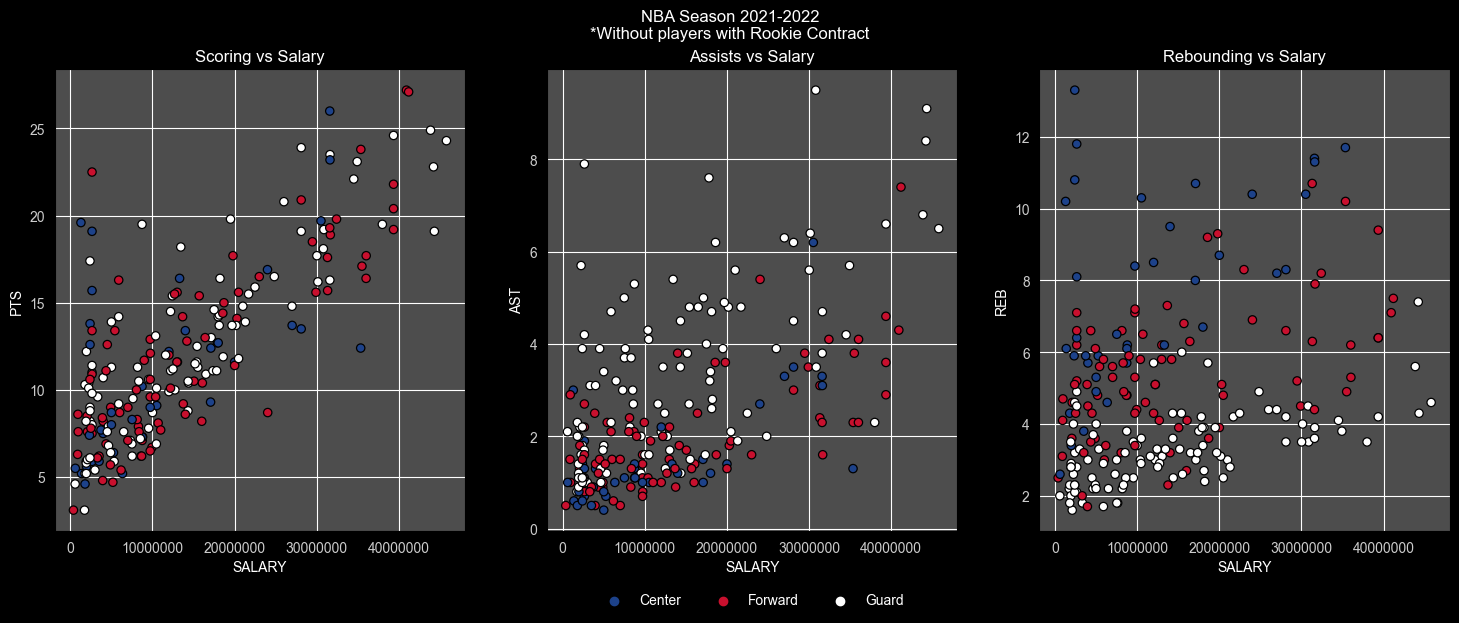

In [43]:
### Complete in this cell: non rookie contracts

no_rokiees_df = working_df[working_df["SEASON_EXP"] > 4]
fig, ax = plt.subplots(1,3, figsize=(18,6))

# Titles
fig.suptitle("NBA Season 2021-2022\n*Without players with Rookie Contract\n\n")
ax[0].title.set_text("Scoring vs Salary")
ax[1].title.set_text("Assists vs Salary")
ax[2].title.set_text("Rebounding vs Salary")

## Plots
# Scoring vs Salary
sns.scatterplot(no_rokiees_df, y="PTS", x="SALARY", hue="POSITION", edgecolor="black", linewidth=.9, ax=ax[0], legend=False).ticklabel_format(style='plain')
# Assists vs Salary
sns.scatterplot(no_rokiees_df, y="AST", x="SALARY", hue="POSITION", edgecolor="black", linewidth=.9, ax=ax[1]).ticklabel_format(style='plain')
# Rebounding vs Salary
sns.scatterplot(no_rokiees_df, y="REB", x="SALARY", hue="POSITION", edgecolor="black", linewidth=.9, ax=ax[2], legend=False).ticklabel_format(style='plain')

# Use the middle axis legend for the whole plot
ax[1].legend(loc='center', bbox_to_anchor=(.5, -.15), frameon=False, shadow=True, ncol=3)

plt.show()


3.5- Plot the scoring average grouped by position, we want to be able to see median, quartiles, etc 

In [44]:
working_df = pd.read_csv("nba_players_processed_dataset.csv")

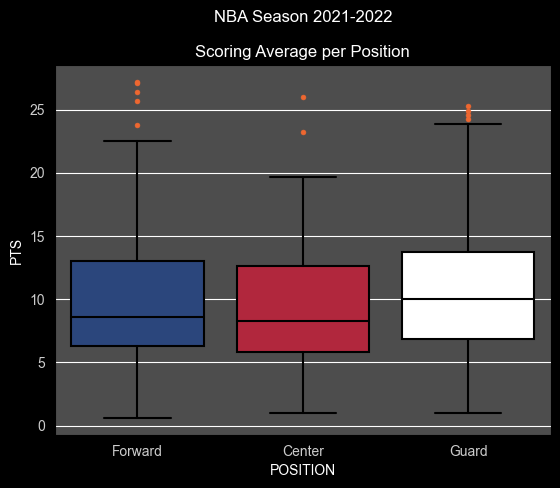

In [45]:
### Complete in this cell: Scoring average grouped by position

# Aestethic props for the plot
props = {'boxprops':{'edgecolor':'0'},'medianprops':{'color':'0'},'whiskerprops':{'color':'0'},'capprops':{'color':'0'},'flierprops':{"markerfacecolor" :'orange', "marker":'o', "markersize":"3.5", "markerfacecolor":"#ee6730","markeredgecolor":"#ee6730", "markeredgewidth":"0.4"}}

# Scoring Average per Position
sns.boxplot(working_df, x="POSITION", y="PTS", **props).set(title="NBA Season 2021-2022\n\nScoring Average per Position")
plt.show()

3.6- Plot the Height distribution of all players

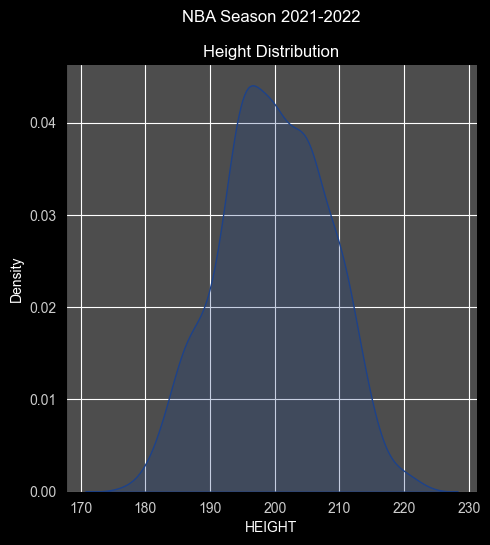

In [46]:
### Complete in this cell: height distribution
sns.displot(working_df, x="HEIGHT", kind="kde", fill=True).set(title="NBA Season 2021-2022\n\nHeight Distribution")
plt.show()

OPTIONAL: Can you find a way to draw a world map and show how many active players per country the NBA has? [Example](https://i.redd.it/8qymui9fnin71.jpg)

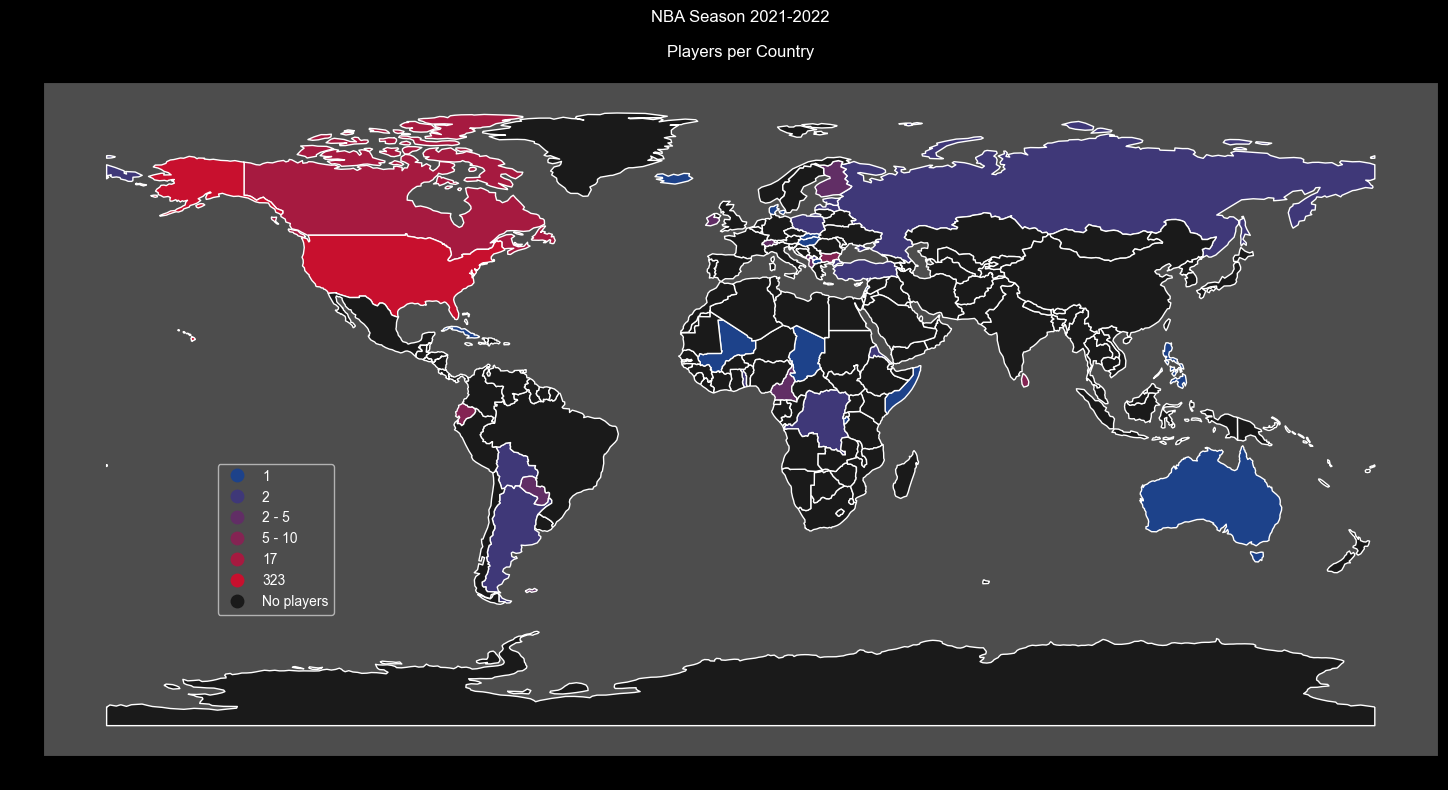

In [47]:
# Creates a geopandas dataframe with country names and location
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Creates a dataframe with the players per country
players_per_country = working_df["COUNTRY"].value_counts()
# Sets the "name" colums, who contains the country names
players_per_country.index.name = "name"
players_per_country = players_per_country.reset_index()

# Change country names on players_per_country to match with the country names in world
players_per_country["name"] = players_per_country["name"].apply(lambda x: "United States of America" if (x=="USA") else x)
players_per_country["name"] = players_per_country["name"].apply(lambda x: "Dem. Rep. Congo" if (x=="DRC" or x=="Republic of the Congo") else x)
players_per_country["name"] = players_per_country["name"].apply(lambda x: "Dominican Rep." if (x=="Dominican Republic") else x)
players_per_country["name"] = players_per_country["name"].apply(lambda x: "Czechia" if (x=="Czech Republic") else x)
players_per_country["name"] = players_per_country["name"].apply(lambda x: "Bosnia and Herz." if (x=="Bosnia and Herzegovina") else x)

# Creates a dataframe that merges world and players per country based on the country names
world_nba = pd.merge(world, players_per_country, on=["name"], how="left")
world_nba.rename(columns={"COUNTRY": "Number_NBA_Players"}, inplace=True)

# Adds a column to world dataframe with the number of players per country
world["Number_NBA_Players"] = world_nba["Number_NBA_Players"]

# Aesthetics for the plot
sns.set_style("dark", {"axes.facecolor": ".3",'figure.facecolor':'black', 'text.color': "1", 'axes.labelcolor': "1", 'xtick.color':'0', 'ytick.color':'0', 'axes.edgecolor':'0'})

## Plot
fig, ax = plt.subplots(1, 1, figsize=(18,15))
# Title
ax.set_title("NBA Season 2021-2022\n\nPlayers per Country\n")
# Creates a colormap for the plot based on the NBA colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", NBA_colors[0:2])
# Plot settings
world.plot(column="Number_NBA_Players", legend=True, ax=ax, categorical=True, cmap=cmap, 
           legend_kwds={'loc': 'lower left', 'bbox_to_anchor':(.12,.2), "labels": ["1","2","2 - 5","5 - 10","17","323"]},
           missing_kwds={'color': '0.1', "label": "No players"}, 
           scheme="userdefined", classification_kwds=dict(bins=[1,2,5,10,17,323]))

plt.show()